In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import AFQ.registration as reg
import AFQ.utils.models as ut
import AFQ.data as afd
import AFQ.tractography as aft
import AFQ.csd as csd
import AFQ.dti as dti
import dipy.data as dpd
import dipy.core.gradients as dpg
import nibabel as nib

In [3]:
import dipy.data.fetcher as fetcher
import os.path as op

In [4]:
dpd.fetch_stanford_hardi()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


({'HARDI150.bval': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.bvals',
   '4e08ee9e2b1d2ec3fddb68c70ae23c36'),
  'HARDI150.bvec': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.bvecs',
   '4c63a586f29afc6a48a5809524a76cb4'),
  'HARDI150.nii.gz': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.nii.gz',
   '0b18513b46132b4d1051ed3364f2acbc')},
 '/Users/arokem/.dipy/stanford_hardi')

In [5]:
hardi_dir = op.join(fetcher.dipy_home, "stanford_hardi")
hardi_fdata = op.join(hardi_dir, "HARDI150.nii.gz")
hardi_fbval = op.join(hardi_dir, "HARDI150.bval")
hardi_fbvec = op.join(hardi_dir, "HARDI150.bvec")

In [6]:
gtab = dpg.gradient_table(hardi_fbval, hardi_fbvec)

In [7]:
from AFQ.utils.streamlines import write_trk, read_trk

In [8]:
streamlines = read_trk('./dti_streamlines.trk') # This assumes you've done the tractography already

In [9]:
import AFQ.segmentation as seg

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [10]:
import imp
imp.reload(seg)

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


<module 'AFQ.segmentation' from '/Users/arokem/source/pyAFQ/AFQ/segmentation.py'>

In [11]:
# Only need to do once, until it's saved
#mapping = reg.syn_register_dwi(hardi_fdata, [hardi_fbval, hardi_fbvec])

In [12]:
#reg.write_mapping(mapping, './mapping.nii.gz')

In [15]:
template_img = dpd.read_mni_template()

Data size is approximately 35MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


In [17]:
mapping = reg.read_mapping('./mapping.nii.gz', hardi_fdata,  template_img)

In [26]:
fiber_groups = seg.segment(hardi_fdata, hardi_fbval, hardi_fbvec, streamlines, mapping=mapping, 
                           as_generator=False)

In [30]:
import seaborn as sns
sns.set(style='white')
from itertools import cycle
pal = cycle(sns.color_palette("hls", 20))

In [31]:
[(k, len(fiber_groups[k])) for k in fiber_groups]

[('IFO_R', 820),
 ('ATR_L', 1),
 ('ATR_R', 109),
 ('SLF_R', 1140),
 ('HCC_L', 19),
 ('CGC_R', 540),
 ('ILF_R', 1370),
 ('CST_R', 748),
 ('UNC_R', 918),
 ('SLF_L', 411),
 ('ARC_R', 801),
 ('CGC_L', 475),
 ('IFO_L', 627),
 ('UNC_L', 451),
 ('HCC_R', 1),
 ('ARC_L', 64),
 ('ILF_L', 429),
 ('CST_L', 419)]

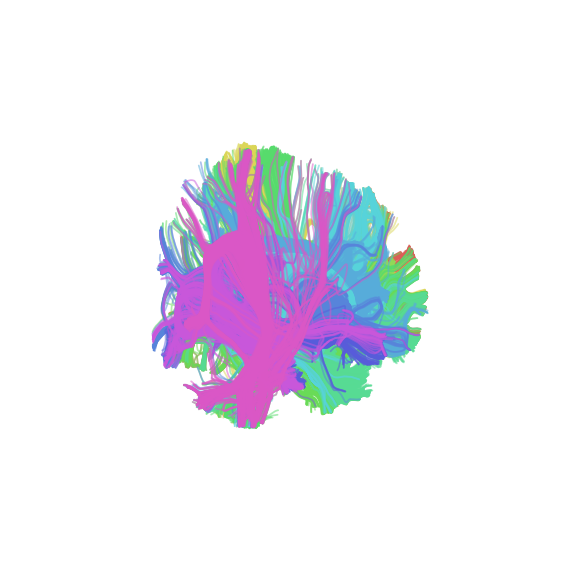

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for k in fiber_groups:
    select_sl = fiber_groups[k]
    color = next(pal)
    for s in select_sl:
        ax.plot(s[:, 0], s[:, 1], s[:, 2], color=color, alpha=0.5)


ax.axis("off")
fig.set_size_inches([10, 10])

for ii, angle in enumerate(range(0, 360, 20)):
    ax.view_init(0, angle)
    fig.savefig('/Users/arokem/tmp/cst/img%03d.png'%ii)

In [ ]:
## For the corticospinal tract, need to potentially deal with fibers that loop through the brainstem

## Deal with fiber outliers

## Compare with the track probability maps? 